# 4장 : 머신러닝의 기본요소


### 구성
1. 머신러닝의 네가지 분류
2. 머신 러닝 모델 평가
3. 데이터 전처리, 특성공학, 특성 학습
4. 과대 적합과 과소 적합
5. 보편적인 머신러닝 작업 흐름
6. 요약


### 이 장에서 다룰 핵심 내용
* 분류와 회귀 이외의 머신 러닝 형태
* 머신 러닝 모델의 올바른 평가 과정
* 딥러닝을 위한 데이터 전처리
* 특성 공학
* 과대적합 문제 해결
* 머신 러닝 문제를 다루는 일반적인 작업 흐름

---

## 4.2 머신러닝 모델 평가
훈련에서 사용된 동일한 데이터로 모델을 평가하지 않은 이유는 **몇번의 에포크 이후로 과대적합되기 시작했기 때문**입니다. 머신러닝의 목표는 처음 본 데이터에서 잘 작동하는 일반화된 모델을 얻는 것 입니다. 여기에서 과대적합은 주요 장애물입니다. 관측할 수 있는 것만 제어할 수 있으므로 모델의 일반화 성능에 대한 신뢰할 수 있는 측정방법이 아주 중요합니다.

### 훈련, 검증, 테스트 세트
모델 평가의 핵심은 *가용한 데이터를 항상 훈련, 검증 테스트 3개의 세트로 나누는 것*입니다. 훈련 세트에서 모델을 훈련하고 검증 세트에서 모델을 평가합니다. 모델을 출시할 준비가 되면 테스트세트에서 최종적으로 딱 한 번 모델을 테스트합니다.

* 훈련 셋, 테스트 셋 총 2개만 사용하면 어떤가?
    * 훨씬 간단한 것 같지만, 이렇게 하지 않는 이유는 **모델을 개발할 때 항상 모델의 설정을 튜닝**하기 때문입니다. (Hyperparameter ; 층의 수나 유닛 층의 수
    * 검증 세트에서 모델의 성능을 평가하여 이런 튜닝을 수행합니다. 본질적으로 이런 튜닝도 어떤 파라미터 공간에서 좋은 설정을 찾는 **학습** 입니다.
    * 검증 세트의 성능을 기반으로 모델의 설정을 튜닝하면 검증 세트로 모델을 직접 훈련하지 않더라도 빠르게 검증 세트에 과대적합될 수 있습니다.
    

* 정보 누설 (Information Leak) : 검증 세트의 모델 성능에 기반하여 모델의 하이퍼파라미터를 조정할 때마다 검증 데이터에 관한 정보가 모델로 새는 것입니다. 검증 데이터 세트에 맞춰 최적화했기 때문에 검증 데이터에 의도적으로 잘 수행되는 모델이 만들어집니다. 검증데이터가 아니고 완전히 새로운 데이터에 대한 성능이 관심 대상이라면 모델을 평가하기 위해 이전에 본 적 없는 완전히 다른 데이터셋을 사용해야합니다. 이것이 바로 *테스트 데이터*입니다.


* 데이터를 훈련, 검증, 테스트 세트로 나누는 것은 간단해보일 수 있지만 몇가지 고급 기법을 사용하면 도움이 됩니다. : hold-out validation, K-fold cross-validation, Shuffling

#### 단순 홀드아웃 검증 (Hold-out Variation)
데이터의 일정량을 테스트 세트로 떄어놓는다. 정보 누설을 막기 위해 테스트 세트를 사용하여 모델 튜닝을 하면 안됩니다. 이런 이유로 검증 세트도 따로 떼어 놓아야 합니다.

In [ ]:
import numpy as np

num_validation_samples = 10000

np.random.shuffle(data)

# 검증 세트를 만듭니다.
validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]

# 훈련 세트를 만듭니다.
training_data = data[:]

# 훈련 세트에서 모델을 훈련하고 검증세트로 평가합니다.
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)

### 여기서 모델을 튜닝하고
### 다시 훈련 -> 평가 -> 튜닝 의 반복

# 하이퍼파라미터 튜닝이 끝나면 테스트 데이터를 제외한 모든 데이터를 사용하여 모델을 다시 훈련시킵니다.
model = get_model()
model.train(np.concatenate([training_data,
                           validation_data]))
test_score = model.evaluate(testdata)

이 평가 방법은 단순해서 한가지 단점이 있습니다. 데이터가 적을 때는 검증 세트와 테스트의 샘플이 너무 적어 주어진 전체 데이터를 통계적으로 대표하지 못할 수도 있습니다.

#### K-겹 교차 검증 (K-Fold Cross-validation)


데이터를 동일한 크기를 가진 K개 분할로 나눕니다. 각 분할 i 에 대하여 남은 K - 1개의 분할로 모델을 훈련하고 분할 i에서 모델을 평가합니다. 최종 점수는 **이렇게 얻은 K개의 점수를 평균합니다.** 모델의 성능이 데이터 분할에 따라 편차가 클 때 도움이 됩니다. 단순 홀드아웃 검증과 똑같이 모델의 튜닝에 별개의 검증세트를 사용하게 됩니다.

In [ ]:
k = 4
num_validation_samples =len(data) / 4

np.random.shuffle(data)

validation_scores = []
for fold in range(k):
    validation_data = data[num_validation_samples * fold:num_validation_samples * (fold + 1)]
    training_data = data[:num_validation_samples * fold] + data[num_validation_samples * (fold+1):]
    
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)
validation_scores.append(validation_score)

validation_score  =  np.average(validation_score)

model = get_model()
model.train(data)
test_score = model.evaluate(test_data)

#### **셔플링**을 사용한 반복 K-겹 교차 검증

이 방법은 비교적 *가용 데이터가 적고 가능한 정환한 모델을 평가하고자 할 때* 사용합니다. **캐글 경연에서는 이 방법이 아주 크게 도움이 됩니다.** 
이 방법은 K-겹 교차 검증을 여러번 적용하게 되 K개의 분할로 나누기 전에 매번 데이터를 무작위로 섞습니다. 최종 점수는 모든 K-겹 교차 검증을 실행해서 얻은 점수의 평균이 됩니다. P X K 의 모델로 훈련하고 평가하므로 비용이 많이듭니다. (P : 반복 횟수)

### 기억해야할 것
평가 방식을 선택할 때 다음 사항을 유념해야 합니다.
1. **대표성 있는 데이터**
2. **시간의 방향** : 과거로부터 미래를 예측하려고 한다면, 데이터를 분할하기 전에 무작위로 섞어서는 저랟로 안됩니다. 이렇게 하면 미래의 정보가 누설되기 떄문입니다. 즉, 모델이 사실상 미래 데이터에서 훈련될 것입니다. 이런 문제에서는 훈련 세트에 있는 데이터보다 테스트 세트에 있는 모든 데이터가 미래의 것이어야 합니다.
3. **데이터 중복**

## 4.3 데이터 전처리, 특성 공학, 특성 학습

*많은 데이터 전처리와 특성 공학기법은 **특정 도메인에 종속적**입니다.*

### 신경망을 위한 데이터 전처리

데이터 전처리의 목적은 주어진 원본 데이터를 신경망에 적용하기 쉽도록 만드는 것입니다.

#### 벡터화 (Vectorization)
신경망에서 모든 입력과 타깃은 부동 소수 데이터로 이루어진 텐서어야 합니다. (특정 경우 정수로 이루어진 텐서) 처리해야할 것이 무엇이든지 먼저 텐서로 변환해야 합니다.

#### 값 정규화 (Normalization)
일반적으로 비교적 큰 값이나 균일하지 않은 데이터를 신경망에 주입하는 것은 위험합니다. 이렇게 하면 업데이트할 그레디언트가 커져 네트워크가 수렴하는 것을 방해합니다.
* 작은 값을 취합니다. 일반적으로 값이 *0 ~ 1* 사이어야 합니다.
* 균일해야합니다. 즉 모든 특성이 대체로 비슷한 범위를 가져야 합니다

추가적으로 다음으로 나오는 엄격한 정규화 방법은 꼭 필수적이지는 않지만 자주 사용되고 도움이 될 수 있습니다.
* 각 특성별로 평균이 0이 되도록 정규합니다.
* 각 특성별로 표준 편차가 1이 되도록 정규화합니다.

In [ ]:
x -= x.mean(axis = 0)
x /= x.std(axis = 0)

#### 누락된 값 다루기

어떤 특성이 모든 샘플에는 들어있지 않는 경우가 있을 수도 있습니다. 일반적으로 신경망에서 0이 사전 정의된 의미있는 값이 아니라면 누락된 값을 0으로 입력해도 괜찮습니다. 네트워크가 0이 누락된 데이터를 의미한다는 것을 학습하면 **이 값을 무시하기 시작할 것입니다.** 반면 네트워크가 누락된 값이 없는 데이터에서 훈련을 받았다면, 이 네트워크는 누락된 값을 무시하는 법을 알지 못합니다. 이런 경우, 누락된 값이 있는 훈련 샘플을 **고의적으로 만들어야합니다.** 훈련 샘플의 일부를 여러벌 복사해서 테스트 데이터에서 빠질 것 같은 특성을 제거합니다.

### 특성 공학

특성 공학은 데이터와 머신 러닝 알고리즘에 관한 지식을 사용하는 단계입니다. 모델에 데이터를 주입하기 전에 하드코딩된 변환을 적용하여 알고리즘이 더 잘 수행되도록 만들어줍니다. 많은 경우에 머신 러닝 모델이 임의의 데이터로부터 완벽한 학습을 한다고 기대하긴 어렵습니다. 모델이 수월하게 작업할 수 있는 어떤 방시긍로 데이터가 표현될 필요가 있습니다.

**특성을 더 간단한 방식**으로 표현하여 문제를 쉽게 만듭니다. 일반적으로 해당 문제를 아주 잘 이해하고 있어야 합니다. *다행이 최근 딥러닝은 대부분 특성공학이 필요하지 않습니다.* 신경망이 자동으로 원본데이터에서 유용한 특성을 추출할 수 있기 때문입니다.
* 좋은 특성은 적은 자원을 사용하여 문제를 더 멋지게 풀어낼 수 있습니다.
* 조흔 특성은 더 적은 데이터로 문제를 풀 수 있습니다. 샘플의 개수가 적다면 특성에 있는 정보가 매우 중요해집니다.


## 4.4 과대적합 (Overfitting), 과소적합 (Underfitting)

머신러닝의 근본적인 이슈는 **최적화(Optimization)과 일반화(Generalization)의 줄다리기** 입니다. 최적화는 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정입니다. (학습), 일반화는 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는 지를 의미합니다.

모델이 관련성이 없고 조지 못한 패턴을 훈련 데이터에서 학습하지 못하도록 하려면 **가장 좋은 방법은 더 많은 훈련데이터를 모으는 것**입니다. 데이터를 더 모으는 것이 불가능할 때 차선책은 모델이 수용할 수 있는 정보의 양을 조절하거나 저장할 수 있는 정보에 제약을 가하는 것입니다. 네트워크가 적은 수의 패턴만 기억할 수 있다면 최적화 과정에서 가장 중요한 패턴에 집중하게 될 것입니다. 이런 패턴은 더 나은 일반화 성능을 제공할 수 있습니다. (= **규제 (Regulization)**)

### 네트워크 크기 축소

딥러닝에서 모델에 있는 학습 파라미터의 수를 종종 모델의 용량 (Capacity)라고 말합니다. **손실을 최소화하기 위해 타깃에 대한 예측 성능을 가진 압축된 표현 학습을 해야합니다.** 동시에 기억해야할 것은 **과소적합되지 않도록 충분한 파라미터를 가진 모델을 사용해야 한다는 점**입니다.

In [16]:
from keras import models
from keras import layers

model1 = models.Sequential()
model1.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model1.add(layers.Dense(16, activation = 'relu'))
model1.add(layers.Dense(1, activation = 'sigmoid'))

In [17]:
### 더 작은 네트워크로 바꾸면...

model2 = models.Sequential()
model2.add(layers.Dense(6, activation = 'relu', input_shape = (10000, )))
model2.add(layers.Dense(6, activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))

##### 영화 리뷰 분류에 적용해보자.

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [8]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [10]:
x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

x_test = vectorize_sequences(test_data)
y_test  = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
y_val = y_train[:10000]

x_train = x_train[10000:]
y_train = y_train[10000:]

In [28]:
model1.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

his1 = model1.fit(x_train, y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.5143 - acc: 0.7780 - val_loss: 0.3908 - val_acc: 0.8565
Epoch 2/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.2991 - acc: 0.9006 - val_loss: 0.3018 - val_acc: 0.8863
Epoch 3/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.2159 - acc: 0.9291 - val_loss: 0.2767 - val_acc: 0.8910
Epoch 4/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.1719 - acc: 0.9434 - val_loss: 0.2762 - val_acc: 0.8908
Epoch 5/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.1373 - acc: 0.9557 - val_loss: 0.2824 - val_acc: 0.8889
Epoch 6/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.1162 - acc: 0.9635 - val_loss: 0.2980 - val_acc: 0.8873
Epoch 7/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.0966 - acc: 0.9717 - val_loss: 0.3170 - 

In [29]:
model2.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

his2 = model2.fit(x_train, y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.6048 - acc: 0.6905 - val_loss: 0.5515 - val_acc: 0.7196
Epoch 2/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.4752 - acc: 0.8509 - val_loss: 0.4374 - val_acc: 0.8741
Epoch 3/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.3581 - acc: 0.9073 - val_loss: 0.3578 - val_acc: 0.8840
Epoch 4/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.2792 - acc: 0.9295 - val_loss: 0.3148 - val_acc: 0.8865
Epoch 5/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.2264 - acc: 0.9377 - val_loss: 0.2951 - val_acc: 0.8885
Epoch 6/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.1894 - acc: 0.9474 - val_loss: 0.2779 - val_acc: 0.8913
Epoch 7/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.1605 - acc: 0.9557 - val_loss: 0.2751 - 

In [12]:
import matplotlib.pyplot as plt

def draw_graph_loss(history):
        history_dict = history.history
        loss = history_dict['loss']
        val_loss = history_dict['val_loss']
        epochs = range(1, len(loss) + 1)
        plt.plot(epochs, loss, 'bo', label = 'Training loss')
        plt.plot(epochs, val_loss, 'b',label = 'Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        plt.clf()
        
def draw_graph_acc(history):
        history_dict = history.history
        loss = history_dict['acc']
        val_acc = history_dict['val_acc']
        epochs = range(1, len(loss) + 1)
        plt.plot(epochs, loss, 'bo', label = 'Training acc')
        plt.plot(epochs, val_acc, 'b',label = 'Validation acc')
        plt.title('Training and validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        plt.clf()

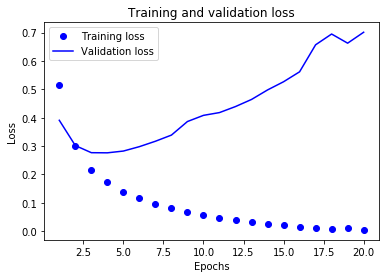

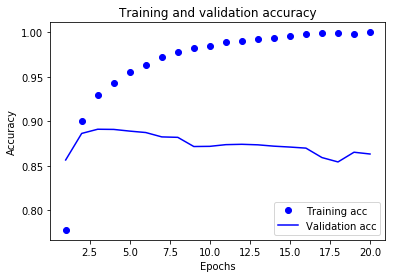

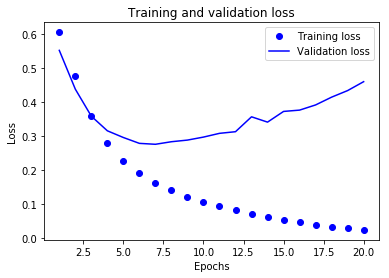

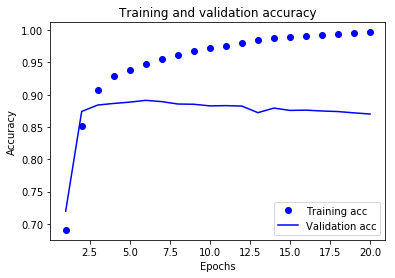

<Figure size 432x288 with 0 Axes>

In [50]:
hisl = [his1, his2]

for his in hisl:
    draw_graph_loss(his)
    draw_graph_acc(his)

용량이 큰 네트워크는 첫 번째 에포크 이후 거의 바로 과대적합이 시작되어 갈수록 더 심해집니다. 검증 손실도 매우 불안정합니다. 큰 넽워크는 훈련손실이 매우 빠르게 0에 가까워집니다. 용량이 많은 네트워크일 수록 더 빠르게 훈련 데이터를 모델링 할 수 있습니다. (결국 훈련손실이 낮아집니다. ) **하지만 더욱 과대적합에 민감해집니다.**

#### 가중치 규제 추가

오캄의 면도날 (Occam's razor) 이론 : 어떤 것에 대한 두 가지의 설명이 있다면 더 적은 가정이 필요한 간단한 설명이 옳을 것이라는 이론
어떤 훈련 데이터와 네트워크 구조가 주어졌을 때 데이터를 설명할 수있는 가중치 값의 집합은 여러 개 입니다. **간단한 모델이 복잡한 모델보다 덜 과대적합될 가능성이 높습니다.**

**간단한 모델**은 파라미터 값 분포의 엔트로피가 작은 모델입니다. (또는 *적은 파라미터를 가진 모델* ) 그러므로 과대적합을 완화하기 위한 일반적인 방법은 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제하는 것입니다. 가중치의 값의 분포가 더 균일하게 됩니다. 이를 **가중치 규제(weight regularization)** 입니다. 네트워크의 손실 함수에 큰 가중치에연관된 비용을 추가합니다.

* **L1 규제** : 가중치의 절댓값에 비례하는 비용이 추가됩니다. (가중치의 L1 norm)
* **L2 규제** : 가중치의 제곱에 비례하는 비용이 추가됩니다. (가중치의 L2 norm) L2규제는 신경망에서 **가중치 감쇠(weight decay)**라고도 부릅니다 (수학적으로 identical)**

In [6]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid')) 

In [11]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

his = model.fit(x_train, y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.5881 - acc: 0.7771 - val_loss: 0.4685 - val_acc: 0.8702
Epoch 2/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.3944 - acc: 0.8969 - val_loss: 0.3771 - val_acc: 0.8830
Epoch 3/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.3099 - acc: 0.9182 - val_loss: 0.3396 - val_acc: 0.8904
Epoch 4/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.2663 - acc: 0.9302 - val_loss: 0.3340 - val_acc: 0.8878
Epoch 5/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.2408 - acc: 0.9371 - val_loss: 0.3273 - val_acc: 0.8887
Epoch 6/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.2258 - acc: 0.9435 - val_loss: 0.3325 - val_acc: 0.8891
Epoch 7/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.2099 - acc: 0.9511 - val_loss: 0.3359 - val_acc

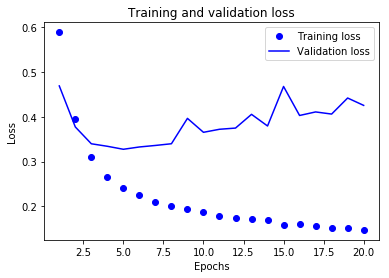

<Figure size 432x288 with 0 Axes>

In [13]:
draw_graph_loss(his)

`l2(0.001)`는 가중치 행렬의 모든 원소를 제곱하고 0.001을 곱하여 네트워크의 전체 손실에 더해진다는 의미를 갖고 있습니다. 이 페널티 항은 훈련할 때만 추가됩니다. 이 네트워크의 손실은 테스트보다 훈련할 때 더 높을 것 입ㄴ디다. **L2 규제를 사용한 모델이 기본 모델보다 훨씬 과대적합에 잘 견디고 있습니다.**

#### Dropout 추가
신경망을 위해 사용되는 규제 기법 중에서 가장 효과적이고 널리 사용되는 방법 중 하나입니다. 네트워크 층에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 출력 특성을 제외시킵니다. (0으로 만듬) 한 층이 정상적으로 훈련하는 동안에는 어떤 입력 샘플에 대해 [0.2, 0.5, 1.3, 0.8, 1.1]벡터를 출력한다고 가정하면, 드롭아웃을 적용했을 때 이벡터의 일부가 0 으로 바뀝니다. (예를 들어 [0, 0.5, 1.3, 0, 1.1]) 드롭아웃의 비율은 0이 될 특성의 비율입니다. 보통 0.2 에서 0.5 사이로 지정됩니다. 테스트 단계에서는 어떤 유닛도 드롭아웃되지 않습니다. 그 대신에 층의 출력을 드롭아웃 비율에 비례하여 줄여 줍니다. 훈련할 때보다 더 많은 유닛이 활성화되기 때문입니다.

**각 샘플에 대해 뉴런의 일부를 무작위하게 제거하면 뉴런의 부정한 협업을 방지하고 결국 과대적합을 감소시킨다.** 핵심 아이디어는 층의 출력 값에 노이즈를 추가하여 중요하지 않은 우연한 패턴을 깨뜨리는 것 입니다. 노이즈가 없다면 네트워크가 이 패턴을 기억하기 시작할 것 입니다.

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.6118 - acc: 0.6641 - val_loss: 0.4984 - val_acc: 0.8044
Epoch 2/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.4880 - acc: 0.7736 - val_loss: 0.3865 - val_acc: 0.8720
Epoch 3/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.4059 - acc: 0.8373 - val_loss: 0.3377 - val_acc: 0.8737
Epoch 4/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.3465 - acc: 0.8671 - val_loss: 0.2966 - val_acc: 0.8893
Epoch 5/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.3059 - acc: 0.8916 - val_loss: 0.2802 - val_acc: 0.8899
Epoch 6/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.2683 - acc: 0.9058 - val_loss: 0.2725 - val_acc: 0.8921
Epoch 7/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.2382 - acc: 0.9211 - val_loss: 0.2735 - val_acc

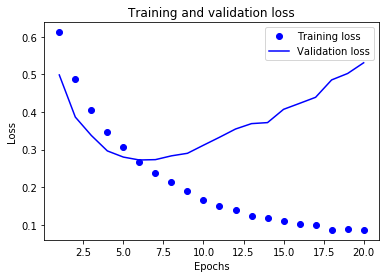

<Figure size 432x288 with 0 Axes>

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid')) 

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

his = model.fit(x_train, y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

draw_graph_loss(his)

#### SUMMARY
신경망에서 과대 적합을 막기위해 가장 널리 사용하는 방법은 다음과 같습니다.
* 훈련 데이터를 더 모읍니다.
* 네트워크의 용량을 감소합니다.
* 가중치 규제를 추가합니다.
* 드롭아웃을 추가합니다.

## 4.5 보편적인 머신러닝의 작업흐름

#### 문제 정의와 데이터셋 수집

#### 성공 지표 선택

#### 평가 방법 선택 
* 홀드아웃 검증 세트 분리 : 데이터가 풍부할 때 사용합니다.
* K-겹 교차 검증 : 홀드아웃 검증을 사용하기에 샘플의 수가 너무 적을 때 사용합니다.
* 반복 K-겹 교차 검증 : 데이터가 적고 매우 정확한 모델 평가가 필요할 때 사용합니다.

#### 데이터 준비
* 앞서 보았듯이 데이터는 텐서로 구성됩니다.
* 이 텐서에 있는 값은 일반적으로 작은 값으로 스케일 조정되어 있습니다. 예를 들어 [-1, 1] 또는 [0, 1]의 범위입니다.
* 특성마다 범위가 다르면 정규화해야 합니다.
* 특성 공학을 수행할 수 있습니다. 특히 데이터가 적을 때입니다.

#### 기본보다 나은 모델 훈련하기
일이 잘 진행된다고 가정하면 첫 번쨰 모델을 만들기 위해 세가지 중요한 선택을 해야합니다.
* 마지막 층의 활성화 함수 : 네트워크 출력의 필요한 제한을 가합니다.
* 손실 함수 : 풀료고 하는 문제의 종류에 적합해야 합니다.
* 최적화 설정

문제 유형 | 마지막 층의 활성화 함수 | 손실함수
-|-|-
이진 분류 | 시그모이드 | `binary_crossentropy`
단일 레이블 다중 분류 | 소프트맥스 | `categorical_crossentropy`
다중 레이블 다중 분류 | 시그모이드 | `binary_crossentropy`
임의 값에 대환 회귀 | 없음 | `mse`
0과 1 사이의 값에 대한 회귀 | 시그모이드 | `mse`또는 `binary_crossentropy`

#### 몸집 키우기 : 과대적합 모델 구축

1. 층을 추가합니다.
2. 층의 크기를 키웁니다

#### 모델 규제와 하이퍼파라미터 튜닝